Le perceptron est un type simple de réseau de neurones à une seule couche, composé d'entrées, de poids associés à ces entrées, d'une fonction de somme pondérée, et d'une fonction d'activation.
Le perceptron était initialement conçu pour résoudre des problèmes de classification linéaire.

In [109]:
import matplotlib.pyplot as plt
import keras

In [110]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [111]:
# Import de MNIST depuis Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Transformation des images 28x28 en vecteur de dimension 784
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
# Normalisation entre 0 et 1
X_train /= 255
X_test /= 255

# Affichage du nombre de'exemples
print(f"{X_train.shape[0]} exemples d'apprentissage")
print(f"{X_test.shape[0]} exemples de test")

60000 exemples d'apprentissage
10000 exemples de test


***Afficher à l’aide de matplotlib les premières images du jeu d’apprentissage.***

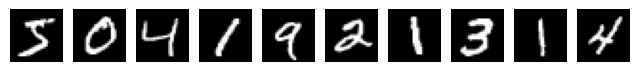

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

n_images = 10
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [113]:
from keras.utils import to_categorical
n_classes = 10
# Conversion des étiquettes (int) au format vectoriel one-hot
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

In [114]:
# Créer le modèle
model = Sequential()
model.add(Dense(1, input_shape=(28 * 28,), activation='linear'))

In [115]:
# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [116]:
# Entraîner le modèle
perceptron=model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.2)


Epoch 1/20
480/480 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.8920 - val_loss: 0.0952 - val_accuracy: 0.9000
Epoch 2/20
480/480 [==============================] - 1s 1ms/step - loss: 0.0932 - accuracy: 0.9000 - val_loss: 0.0919 - val_accuracy: 0.9000
Epoch 3/20
480/480 [==============================] - 1s 1ms/step - loss: 0.0912 - accuracy: 0.9000 - val_loss: 0.0908 - val_accuracy: 0.9000
Epoch 4/20
480/480 [==============================] - 1s 1ms/step - loss: 0.0905 - accuracy: 0.9000 - val_loss: 0.0903 - val_accuracy: 0.9000
Epoch 5/20
480/480 [==============================] - 1s 1ms/step - loss: 0.0902 - accuracy: 0.9000 - val_loss: 0.0901 - val_accuracy: 0.9000
Epoch 6/20
480/480 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9000 - val_loss: 0.0900 - val_accuracy: 0.9000
Epoch 7/20
480/480 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9000 - val_loss: 0.0900 - val_accuracy: 0.9000
Epoch 

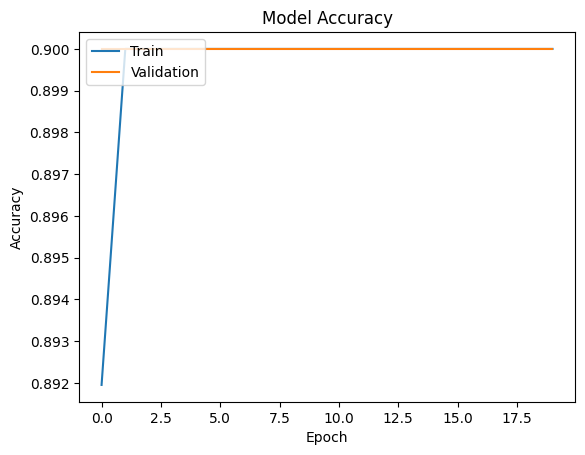

In [117]:
# Affichage des courbes d'entraînement et de validation pour la précision
plt.plot(perceptron.history['accuracy'])
plt.plot(perceptron.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [118]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9000
Test Accuracy: 0.8999972939491272


**Perceptron** **multilayer**

In [119]:
from keras.utils import to_categorical

# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Prétraitement des données
X_train = X_train.reshape((X_train.shape[0], -1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)).astype('float32') / 255.0

# Transformer les étiquettes en binaire (0 ou 1)
y_train_binary = (y_train == 0).astype(int)
y_test_binary = (y_test == 0).astype(int)

# Convertir les étiquettes en représentation one-hot
Y_train = to_categorical(y_train_binary, num_classes=2)
Y_test = to_categorical(y_test_binary, num_classes=2)


In [121]:
# Créer le modèle MLP
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))  # Couche cachée avec fonction d'activation ReLU
model.add(Dense(10, activation='sigmoid'))  # Couche de sortie avec fonction d'activation sigmoïde



In [122]:
# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [123]:
# Entraîner le modèle
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0682 - accuracy: 0.9059 - val_loss: 0.0366 - val_accuracy: 0.9489
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0308 - accuracy: 0.9562 - val_loss: 0.0286 - val_accuracy: 0.9597
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0221 - accuracy: 0.9696 - val_loss: 0.0223 - val_accuracy: 0.9692
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0173 - accuracy: 0.9774 - val_loss: 0.0192 - val_accuracy: 0.9729
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0140 - accuracy: 0.9826 - val_loss: 0.0189 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0116 - accuracy: 0.9860 - val_loss: 0.0175 - val_accuracy: 0.9758
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0097 - accuracy: 0.9886 - val_loss: 0.0173 - val_accuracy:

In [124]:
# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9783
Test Accuracy: 97.83%
